In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

Вы работаете аналитиком в приложении по доставке продуктов. Команда внедрила в приложение умную систему рекомендации товаров – предполагается, что такая система поможет пользователям эффективнее работать с приложением и лучше находить необходимые товары.

Чтобы проверить эффективность системы рекомендаций, был проведен АБ-тест. В группе 1 оказались пользователи с новой системой рекомендаций, в группе 0 пользователи со старой версией приложения, где нет рекомендации товаров.

Ваша задача – оценить, смогла ли новая система рекомендаций принести пользу бизнесу и пользователям приложения. Для этого нужно выбрать одну или несколько метрик, которая отвечает за качество сервиса и статистически сравнить эти метрики в двух группах.

Результат вашей работы – аналитическое заключение с ответом на вопрос, стоит ли включать новую систему рекомендаций на всех пользователей.

В данных вы найдете логи заказов пользователей:

- ab_users_data – история заказов пользователей, в этой таблице есть информация о том, какие заказы создавали и отменяли пользователи
- ab_orders – подробная информация о составе заказа, тут для каждого заказа есть список id тех продуктов, которые были включены в заказ
- ab_products – подробная информация о продуктах, их название и стоимость

### Из описания: 
     - польза бизнесу - стал ли больше доход / стали ли больше покупать в целом
    - польза пользователю - стал ли чаще/больше покупать

In [2]:
ab_products = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/statistics/lesson_10/ab_products.csv')
ab_orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/statistics/lesson_10/ab_orders.csv')
ab_users_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/statistics/lesson_10/ab_users_data.csv')

In [3]:
# 1 читаю данные

In [4]:
ab_products # подробная информация о продуктах, их название и стоимость

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0
...,...,...,...
82,83,вафли,55.0
83,84,мандарины,90.4
84,85,варенье,200.3
85,86,кофе холодный,70.3


In [5]:
ab_products.dtypes

product_id      int64
name           object
price         float64
dtype: object

In [6]:
ab_products.nunique()

product_id    87
name          87
price         63
dtype: int64

In [7]:
ab_products.describe()

,product_id,price
count,87.000000,87.000000
mean,44.000000,133.581609
std,25.258662,136.127922
min,1.000000,1.000000
25%,22.500000,55.000000
50%,44.000000,76.300000
75%,65.500000,160.000000
max,87.000000,800.000000


In [8]:
ab_products.isna().sum()

product_id    0
name          0
price         0
dtype: int64

In [9]:
ab_orders # подробная информация о составе заказа, тут для каждого заказа есть список id тех продуктов, которые были включены в заказ

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56.000000,"{74, 6}"
4,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}"
...,...,...,...
4118,59422,2022-09-08 23:13:03.000000,"{84, 8, 24}"
4119,59439,2022-09-08 23:18:05.000000,"{9, 25, 75, 30, 6}"
4120,59464,2022-09-08 23:22:27.000000,"{60, 41, 46}"
4121,59487,2022-09-08 23:29:06.000000,"{9, 62, 77}"


In [10]:
ab_orders.dtypes

order_id          int64
creation_time    object
product_ids      object
dtype: object

In [11]:
ab_orders.creation_time = pd.to_datetime(ab_orders.creation_time)

In [12]:
ab_orders.dtypes

order_id                  int64
creation_time    datetime64[ns]
product_ids              object
dtype: object

In [13]:
ab_orders.nunique()

order_id         4123
creation_time    4098
product_ids      3877
dtype: int64

In [14]:
ab_orders.describe()

,order_id
count,4123.000000
mean,16387.899103
std,16644.518947
min,1255.000000
25%,2444.500000
50%,9614.000000
75%,27000.000000
max,59533.000000


In [15]:
ab_orders.isna().sum()

order_id         0
creation_time    0
product_ids      0
dtype: int64

In [16]:
ab_users_data # история заказов пользователей, в этой таблице есть информация о том, какие заказы создавали и отменяли пользователи

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0


In [17]:
ab_users_data.dtypes

user_id      int64
order_id     int64
action      object
time        object
date        object
group        int64
dtype: object

In [18]:
ab_users_data.date = pd.to_datetime(ab_users_data.date)
ab_users_data.time = pd.to_datetime(ab_users_data.time)

In [19]:
ab_users_data.dtypes

user_id              int64
order_id             int64
action              object
time        datetime64[ns]
date        datetime64[ns]
group                int64
dtype: object

In [20]:
ab_users_data

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37,2022-08-26,1
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0


In [21]:
ab_users_data.nunique()

user_id     1017
order_id    4123
action         2
time        4312
date          14
group          2
dtype: int64

In [22]:
ab_users_data.describe()

,user_id,order_id,group
count,4337.000000,4337.000000,4337.000000
mean,1466.771270,16362.859811,0.610099
std,290.451607,16609.671919,0.487784
min,964.000000,1255.000000,0.000000
25%,1220.000000,2444.000000,0.000000
50%,1463.000000,9615.000000,1.000000
75%,1710.000000,26920.000000,1.000000
max,1980.000000,59533.000000,1.000000


In [23]:
ab_users_data.isna().sum()

user_id     0
order_id    0
action      0
time        0
date        0
group       0
dtype: int64

In [24]:
# 2 проведем джойн

In [25]:
user_orders = pd.merge(ab_users_data, ab_orders, on = 'order_id', how = 'outer')

In [26]:
user_orders # кол-во строк не изменилось при внешнем джойне, это говорит о том, что линих данных нет и все заджойнилось

,user_id,order_id,action,time,date,group,creation_time,product_ids
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}"
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,2022-08-26 00:02:21,"{56, 76, 39}"
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,2022-08-26 00:02:27,"{76, 34, 41, 38}"
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0,2022-08-26 00:02:56,"{74, 6}"
4,966,1258,cancel_order,2022-08-26 00:08:25.486419,2022-08-26,0,2022-08-26 00:02:56,"{74, 6}"
...,...,...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1,2022-09-08 23:13:03,"{84, 8, 24}"
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1,2022-09-08 23:18:05,"{9, 25, 75, 30, 6}"
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0,2022-09-08 23:22:27,"{60, 41, 46}"
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}"


In [27]:
user_orders['product_id'] = user_orders['product_ids'].str.strip('{}').str.split(', ') # разбиваем запись типа {75, 22, 53, 84} в список

In [28]:
user_orders

,user_id,order_id,action,time,date,group,creation_time,product_ids,product_id
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}","[75, 22, 53, 84]"
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,2022-08-26 00:02:21,"{56, 76, 39}","[56, 76, 39]"
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,2022-08-26 00:02:27,"{76, 34, 41, 38}","[76, 34, 41, 38]"
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0,2022-08-26 00:02:56,"{74, 6}","[74, 6]"
4,966,1258,cancel_order,2022-08-26 00:08:25.486419,2022-08-26,0,2022-08-26 00:02:56,"{74, 6}","[74, 6]"
...,...,...,...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1,2022-09-08 23:13:03,"{84, 8, 24}","[84, 8, 24]"
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1,2022-09-08 23:18:05,"{9, 25, 75, 30, 6}","[9, 25, 75, 30, 6]"
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0,2022-09-08 23:22:27,"{60, 41, 46}","[60, 41, 46]"
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}","[9, 62, 77]"


In [29]:
# возьмем ещё неразбитый список продуктов и проиндексируем. Это необходимо для шага 4
user_orders['Index'] = user_orders.reset_index().index
user_orders

,user_id,order_id,action,time,date,group,creation_time,product_ids,product_id,Index
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}","[75, 22, 53, 84]",0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,2022-08-26 00:02:21,"{56, 76, 39}","[56, 76, 39]",1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,2022-08-26 00:02:27,"{76, 34, 41, 38}","[76, 34, 41, 38]",2
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0,2022-08-26 00:02:56,"{74, 6}","[74, 6]",3
4,966,1258,cancel_order,2022-08-26 00:08:25.486419,2022-08-26,0,2022-08-26 00:02:56,"{74, 6}","[74, 6]",4
...,...,...,...,...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1,2022-09-08 23:13:03,"{84, 8, 24}","[84, 8, 24]",4332
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1,2022-09-08 23:18:05,"{9, 25, 75, 30, 6}","[9, 25, 75, 30, 6]",4333
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0,2022-09-08 23:22:27,"{60, 41, 46}","[60, 41, 46]",4334
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}","[9, 62, 77]",4335


In [30]:
user_orders_expanded = user_orders.explode('product_id') # разбиваем получившийся список в построчну запись

In [31]:
user_orders_expanded

,user_id,order_id,action,time,date,group,creation_time,product_ids,product_id,Index
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}",75,0
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}",22,0
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}",53,0
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}",84,0
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1,2022-08-26 00:02:21,"{56, 76, 39}",56,1
...,...,...,...,...,...,...,...,...,...,...
4335,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}",9,4335
4335,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}",62,4335
4335,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}",77,4335
4336,1376,59533,create_order,2022-09-08 23:41:24,2022-09-08,0,2022-09-08 23:41:24,"{17, 85}",17,4336


In [32]:
user_orders_expanded.dtypes

user_id                   int64
order_id                  int64
action                   object
time             datetime64[ns]
date             datetime64[ns]
group                     int64
creation_time    datetime64[ns]
product_ids              object
product_id               object
Index                     int64
dtype: object

In [33]:
user_orders_expanded['product_id'] = user_orders_expanded['product_id'].astype('int64')

In [34]:
user_orders_expanded.dtypes

user_id                   int64
order_id                  int64
action                   object
time             datetime64[ns]
date             datetime64[ns]
group                     int64
creation_time    datetime64[ns]
product_ids              object
product_id                int64
Index                     int64
dtype: object

In [35]:
# за джойним оставшуюся таблицу и назовем это все df
df = pd.merge(user_orders_expanded, ab_products, on = 'product_id', how = 'outer')

In [36]:
# кол-во строк не изменилось, супер
df

,user_id,order_id,action,time,date,group,creation_time,product_ids,product_id,Index,name,price
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}",75,0,сок ананасовый,120.0
1,987,1287,create_order,2022-08-26 00:31:36,2022-08-26,0,2022-08-26 00:31:36,"{83, 75}",75,28,сок ананасовый,120.0
2,1073,1403,create_order,2022-08-26 03:01:40,2022-08-26,1,2022-08-26 03:01:40,"{75, 50, 2, 83, 67, 30}",75,133,сок ананасовый,120.0
3,1089,1424,create_order,2022-08-26 04:01:22,2022-08-26,1,2022-08-26 04:01:22,"{75, 29, 5, 2, 50, 62}",75,153,сок ананасовый,120.0
4,1139,1495,create_order,2022-08-26 06:04:05,2022-08-26,1,2022-08-26 06:04:05,"{20, 75, 70, 44}",75,213,сок ананасовый,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14564,1883,33910,create_order,2022-09-03 23:46:53,2022-09-03,1,2022-09-03 23:46:53,"{53, 11, 2, 7, 77, 87}",11,3544,масло льняное,200.0
14565,1440,34742,create_order,2022-09-04 03:41:52,2022-09-04,0,2022-09-04 03:41:52,"{46, 17, 11, 87}",11,3570,масло льняное,200.0
14566,1813,41998,create_order,2022-09-05 10:26:46,2022-09-05,1,2022-09-05 10:26:46,"{32, 20, 11, 9, 8}",11,3835,масло льняное,200.0
14567,1175,53851,create_order,2022-09-07 23:53:54,2022-09-07,0,2022-09-07 23:53:54,"{11, 70, 49, 3}",11,4197,масло льняное,200.0


In [37]:
# кол-во строк не изменилось, супер

In [38]:
df.nunique()

user_id          1017
order_id         4123
action              2
time             4312
date               14
group               2
creation_time    4098
product_ids      3877
product_id         87
Index            4337
name               87
price              63
dtype: int64

### 3 Метрика - прибыль

Прибыль с покупателя
Прибыль с определенного продукта

H0 - прибыль не изменилась
H1 - изменилась

Переменная непрерывная. 

### А. Прибыль с покупателя

In [39]:
# 3.1 графики распределения

In [40]:
df_control_price = df.query('group == 0 and action == "create_order"').groupby('user_id').agg({'price':'sum'})

In [41]:
df_control_price

,price
user_id,
964,718.9
966,85.0
968,1590.7
969,681.9
972,546.4
...,...
1971,1680.5
1972,1439.1
1973,801.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d67634748>]],
      dtype=object)

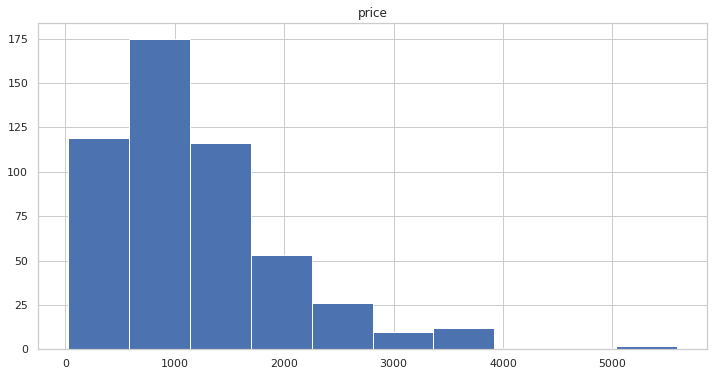

In [42]:
df_control_price.hist()

In [43]:
df_test_price = df.query('group == 1 and action == "create_order"').groupby('user_id').agg({'price':'sum'})
df_test_price

,price
user_id,
965,4155.5
967,1137.4
970,802.8
971,1968.4
973,1506.6
...,...
1976,2001.9
1977,781.2
1978,2766.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d65378be0>]],
      dtype=object)

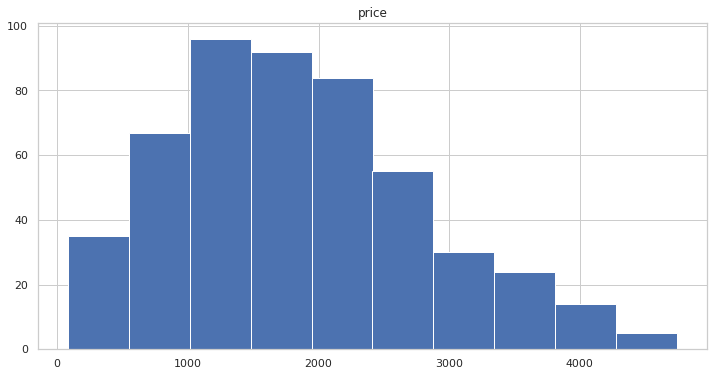

In [44]:
df_test_price.hist()

In [45]:
# 3.2 Теперь давайте изучим наши распределения. 
# Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле

In [46]:
ss.normaltest(df_control_price.price)

NormaltestResult(statistic=158.0427044510244, pvalue=4.802449159173491e-35)

In [47]:
np.std(df_control_price.price)

828.8278679667425

In [48]:
ss.normaltest(df_test_price.price)

NormaltestResult(statistic=21.921081107450227, pvalue=1.7373916056009258e-05)

In [49]:
np.std(df_test_price.price)

952.7194735039106

новость плохая но очевидная:распределения ненормальны

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d67441b38>,
      dtype=object)

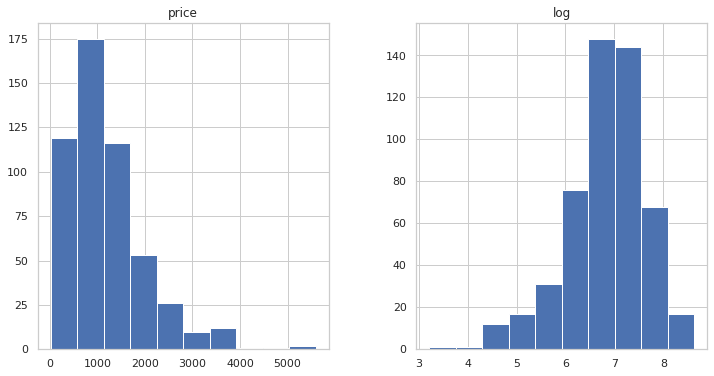

In [50]:
df_control_price['log'] = df_control_price['price'].apply(lambda x: np.log(x))
df_control_price.hist()

In [51]:
ss.normaltest(df_control_price.log)

NormaltestResult(statistic=70.34242927061122, pvalue=5.31294796011223e-16)

In [52]:
df_test_price['log'] = df_test_price['price'].apply(lambda x: np.log(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d64e01208>,
      dtype=object)

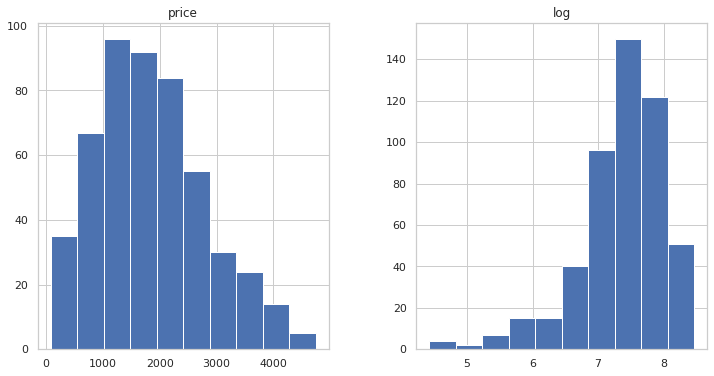

In [53]:
df_test_price.hist()

In [54]:
ss.normaltest(df_control_price.log)

NormaltestResult(statistic=70.34242927061122, pvalue=5.31294796011223e-16)

Вывод: логарифмы нас не спасут

### 3.3 Промежуточный вывод:
    - ненормальные распределения
    - выборки независимы
    - переменная непрерывная

Т.о. выбираем U-критерий Манна-Уитни

In [55]:
from scipy.stats import mannwhitneyu
statistic1, p_value1 = mannwhitneyu(df_control_price.price, df_test_price.price)

print("Statistic:", statistic1)
print("p-value:", p_value1)

Statistic: 73198.5
p-value: 4.991032611140459e-33


In [56]:
df_control_price.price.sum()

613488.8

In [57]:
df_test_price.price.sum()

929232.0

In [58]:
df_test_price.price.sum() - df_control_price.price.sum()

315743.19999999995

In [59]:
df_test_price.price.sum()*100/df_control_price.price.sum()

151.46682384421686

# 3 Вывод по метрике "прибыль". Шалость удалась на 52 % - внедряем

### 4 Метрика польза пользователю - стал ли больше покупать за одну покупку

In [60]:
# 4.1 
df.head()

,user_id,order_id,action,time,date,group,creation_time,product_ids,product_id,Index,name,price
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}",75,0,сок ананасовый,120.0
1,987,1287,create_order,2022-08-26 00:31:36,2022-08-26,0,2022-08-26 00:31:36,"{83, 75}",75,28,сок ананасовый,120.0
2,1073,1403,create_order,2022-08-26 03:01:40,2022-08-26,1,2022-08-26 03:01:40,"{75, 50, 2, 83, 67, 30}",75,133,сок ананасовый,120.0
3,1089,1424,create_order,2022-08-26 04:01:22,2022-08-26,1,2022-08-26 04:01:22,"{75, 29, 5, 2, 50, 62}",75,153,сок ананасовый,120.0
4,1139,1495,create_order,2022-08-26 06:04:05,2022-08-26,1,2022-08-26 06:04:05,"{20, 75, 70, 44}",75,213,сок ананасовый,120.0


Мы проиндексировали каждый заказ и теперь, несмотря на рабивку, можем вновь сгрупировать и посмотреть на кол-во продуктов в корзине.

### Увеличилась ли продуктовая корзина? 
(эта метрика для покупателя, а вот стоимость корзины - это метрика для бизнеса, но поскольку доход у нас значимо увелиился , это нас интересует не в первую очередь, т.к. дедлайн и я хочу спать)

In [61]:
df_control_product_id_count = df.query('group == 0 and action == "create_order"').groupby('Index').agg({'product_id':'count'})
df_control_product_id_count

,product_id
Index,
0,4
2,4
3,2
6,4
7,4
...,...
4326,3
4327,4
4334,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d64c32358>]],
      dtype=object)

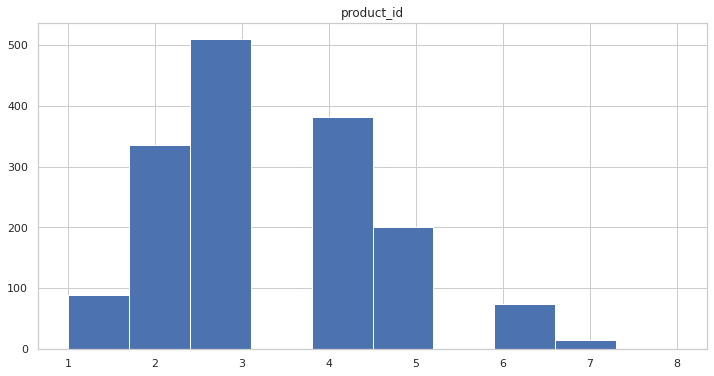

In [62]:
df_control_product_id_count.hist()

In [63]:
ss.normaltest(df_control_product_id_count.product_id)

NormaltestResult(statistic=37.487068075385594, pvalue=7.240800736554414e-09)

In [64]:
# тоже самое для второй группы

In [65]:
df_test_product_id_count = df.query('group == 1 and action == "create_order"').groupby('Index').agg({'product_id':'count'})
df_test_product_id_count

,product_id
Index,
1,3
5,4
8,3
9,4
11,2
...,...
4329,4
4330,3
4331,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d64c03cf8>]],
      dtype=object)

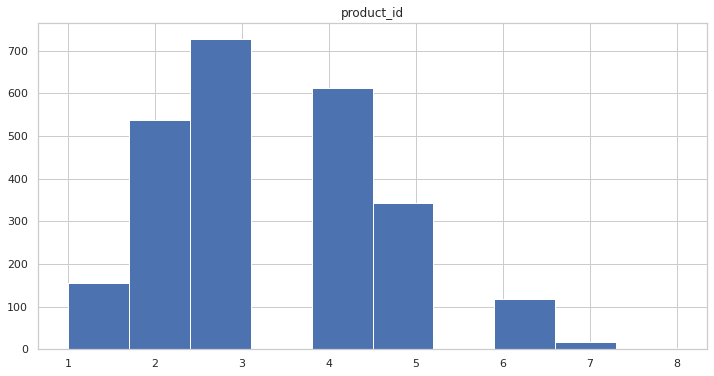

In [66]:
df_test_product_id_count.hist()

In [67]:
ss.normaltest(df_test_product_id_count.product_id)

NormaltestResult(statistic=46.45617611244517, pvalue=8.169011962301745e-11)

### 4.2 Промежуточный вывод:
    - ненормальные распределения
    - выборки независимы
    - переменная непрерывная

Т.о. выбираем U-критерий Манна-Уитни

In [68]:
from scipy.stats import mannwhitneyu
statistic1, p_value1 = mannwhitneyu(df_control_product_id_count.product_id, df_test_product_id_count.product_id)

print("Statistic:", statistic1)
print("p-value:", p_value1)

Statistic: 2013211.0
p-value: 0.797659849654466


# Вывод по метрике 4 Кол-во продуктов покупаемых за раз не изменилось. А значит доход изменился на основании повторяемости (т.е. клиенты стали возвращаться на сайт чаще)

Совет для бизнеса: Мне было бы еще интересно посмотреть среднее время заказа - увеличилось/уменьшилось. Это хорошая метрика для отслеживани удобства пользователя